In [1]:
import pandas as pd

df = pd.read_csv('/content/tip_dataset.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [3]:
df['sex']=df['sex'].map({'Male':1,'Female':0})

In [4]:
df['day']=df['day'].map({'Sun':0,'Mon':1,'Tue':2,'Wed':3,'Thur':4,'Fri':5,'Sat':6})

In [5]:
df['time']=df['time'].map({'Dinner':0,'Lunch':1})

In [6]:
df['smoker']=df['smoker'].map({'No':0,'Yes':1})

In [7]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [9]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,3.545082,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,2.511295,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,4.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,6.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,6.000000,1.000000,6.000000


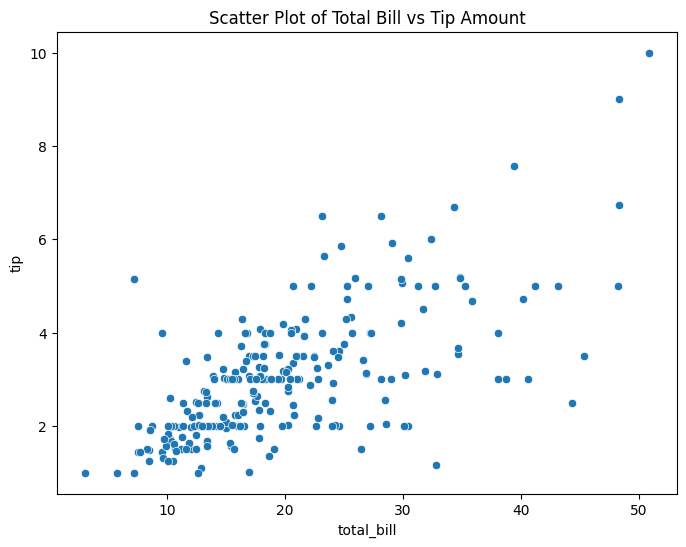

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('Scatter Plot of Total Bill vs Tip Amount')
plt.show()

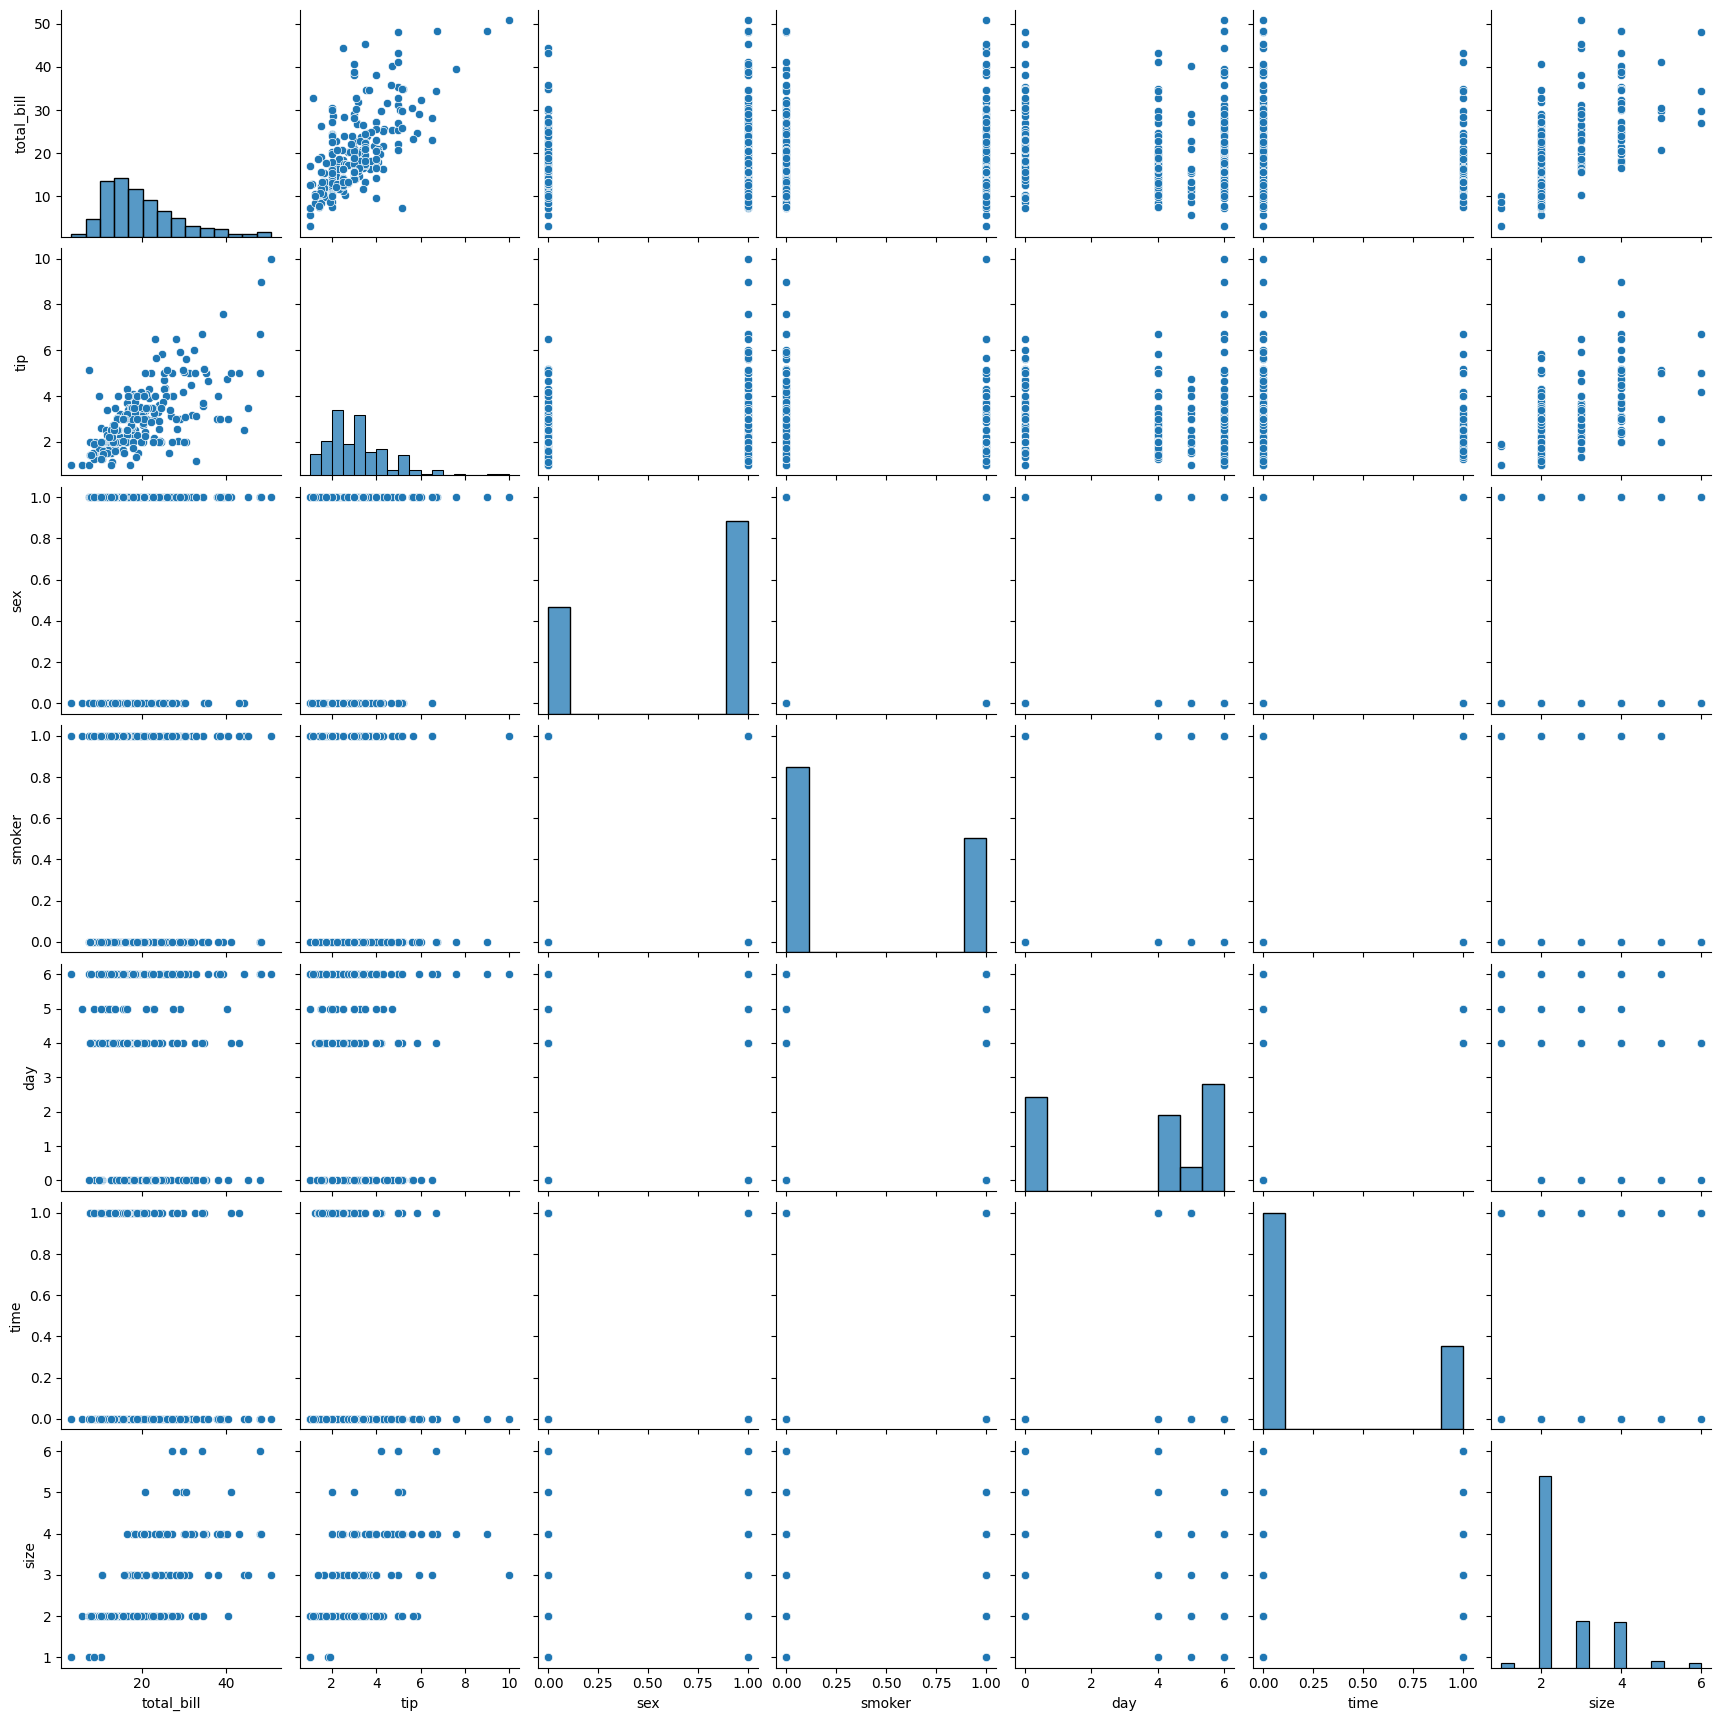

In [11]:
sns.pairplot(df)
plt.show()

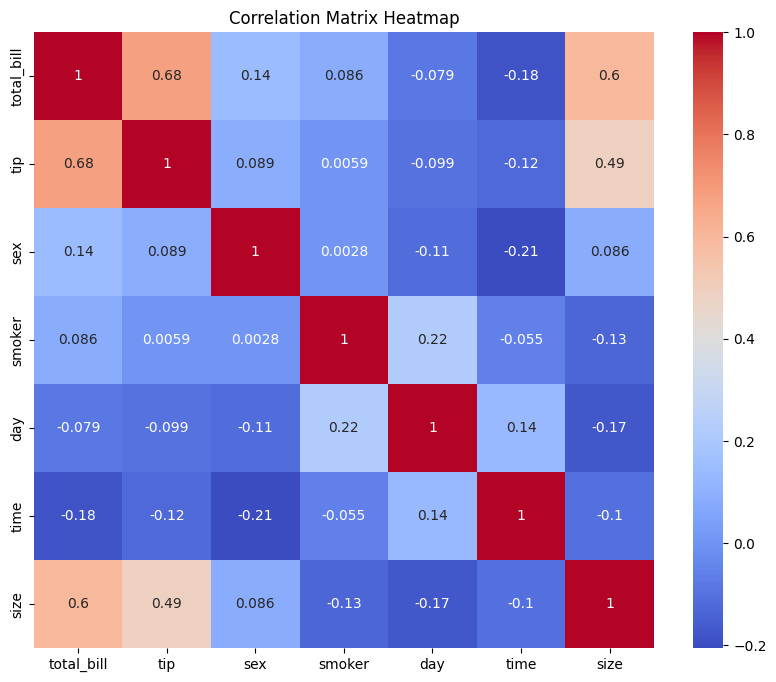

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm


X = df[['total_bill']]
X = sm.add_constant(X)
y = df['tip']
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow test p-value:", rainbow_p_value)

Rainbow test p-value: 0.1291192152551375


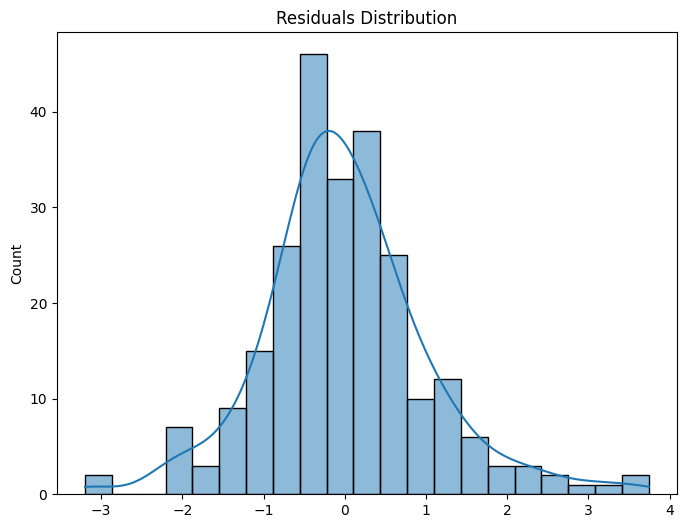

In [14]:
residuals = model.resid
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [15]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred = linear_model.predict(X_test)

In [17]:
r2_score(y_test, y_pred)

0.4404195788256978

# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge, Lasso


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


r2_score(y_test, y_pred_ridge)

0.44189318774519226

# Lasso Regression

In [19]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


r2_score(y_test, y_pred_lasso)

0.522002302111358

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

r2_score(y_test, y_pred_dt)

0.2428152955243088

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=500,max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


r2_score(y_test, y_pred_rf)

0.35299397130418275

# Support Vector Regression - Linear Kernel

In [22]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)


r2_score(y_test, y_pred_svr)

0.4666939313204431

# Support Vector Regression - rbf Kernel

In [23]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr_rbf = svr_model.predict(X_test)


r2_score(y_test, y_pred_svr_rbf)

0.5679975059499105

# KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


r2_score(y_test, y_pred_knn)

0.3036859153989103

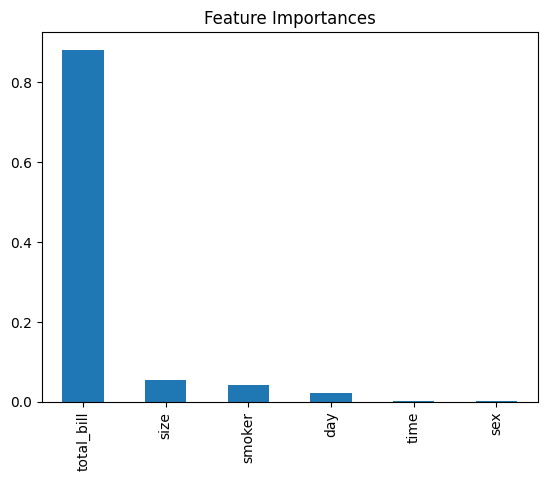

In [29]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title("Feature Importances")
plt.show()


In [30]:
print("Linear Regression Coefficients:")
pd.Series(linear_model.coef_, index=X.columns)

Linear Regression Coefficients:


,0
total_bill,0.094307
sex,0.024229
smoker,-0.167587
day,-0.020589
time,0.068012
size,0.230650


RMSE of the best model which is SVR - rbf kerenel

In [31]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr_rbf))

In [32]:
rmse

0.7348406212567433